Required Library

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching data from Yahoo Finance Libarary

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


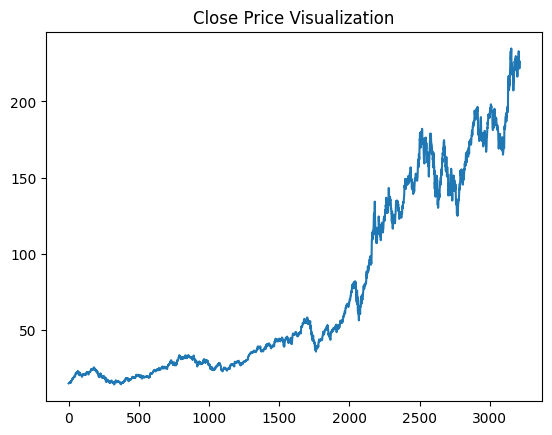

In [ ]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
3207,225.889999,227.369995,223.020004,226.779999,32880600
3208,225.139999,226.809998,223.320007,225.669998,34044200
3209,227.899994,228.000000,224.130005,226.800003,37245100
3210,224.500000,225.690002,221.330002,221.690002,39505400


# Plotting Moving Average of 30 days

In [ ]:
ma30 = df.Close.rolling(30).mean()
ma30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3207,224.880333
3208,224.856000
3209,224.931667
3210,224.760001


Text(0.5, 1.0, 'Graph Of Moving Averages Of 30 Days')

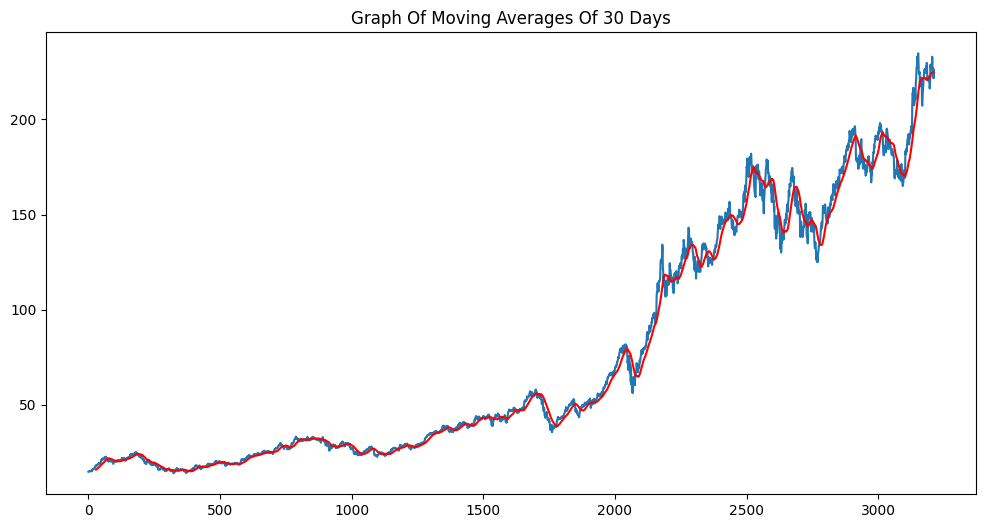

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma30, 'r')
plt.title('Graph Of Moving Averages Of 30 Days')

50 days moving average

In [ ]:
ma50 = df.Close.rolling(50).mean()
ma50

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3207,222.346001
3208,222.488601
3209,222.674801
3210,222.749401


Text(0.5, 1.0, 'Graph Of Moving Averages Of 50 Days')

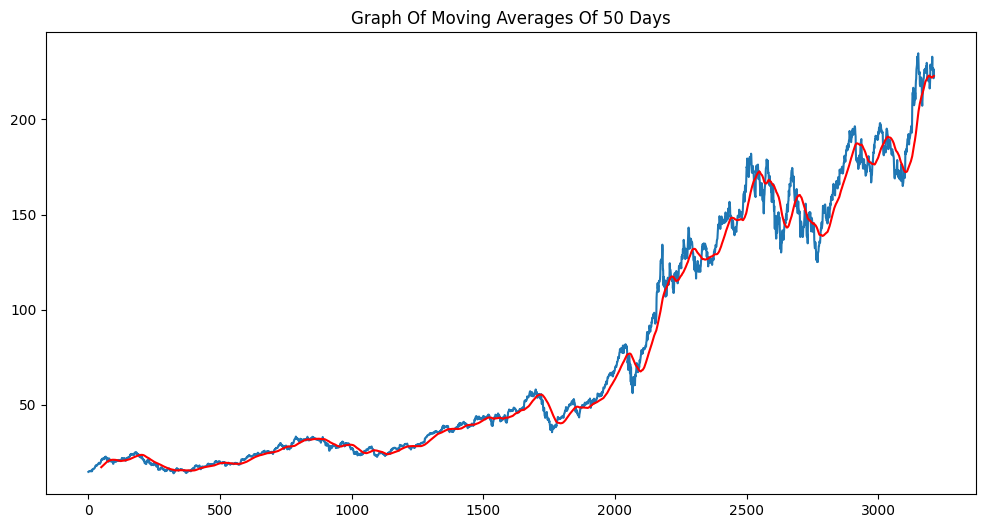

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')
plt.title('Graph Of Moving Averages Of 50 Days')

Comparison of 30 days and 50 days moving average

Text(0.5, 1.0, 'Comparision Of 30 Days And 50 Days Moving Averages')

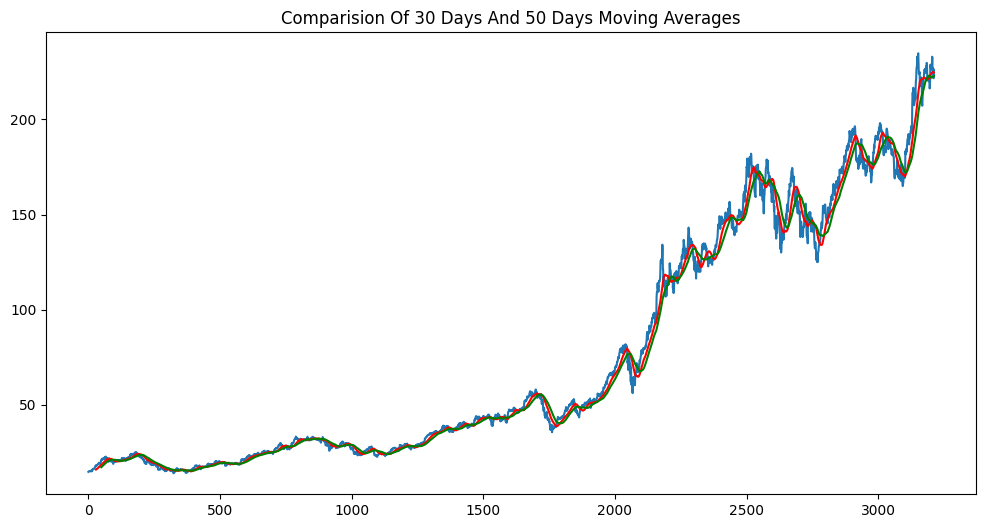

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma30, 'r')
plt.plot(ma50, 'g')
plt.title('Comparision Of 30 Days And 50 Days Moving Averages')

100 days Moving Average

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3207,215.0552
3208,215.4814
3209,215.8866
3210,216.2292


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

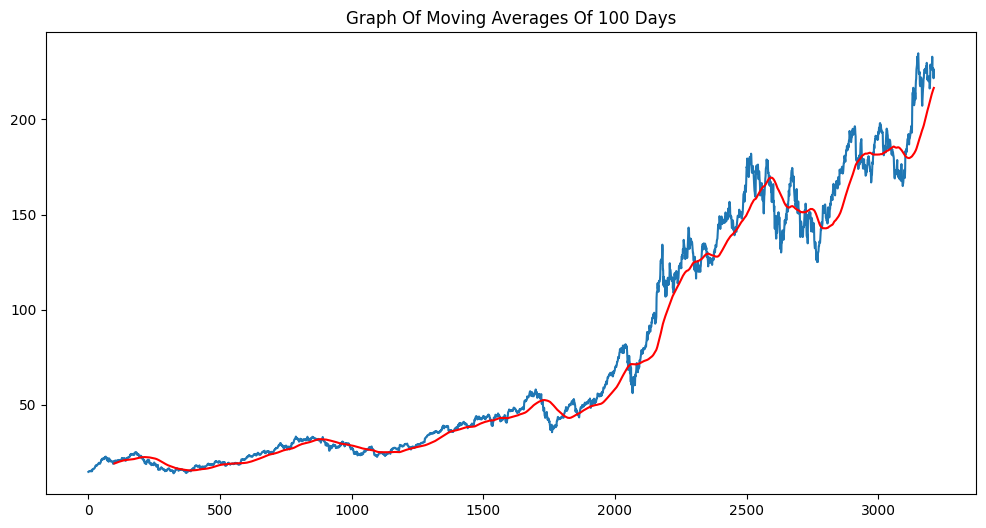

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

Moving Average of 200 days

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3207,197.65710
3208,197.79760
3209,197.95215
3210,198.07590


Text(0.5, 1.0, 'Graph Of Moving Averages Of 200 Days')

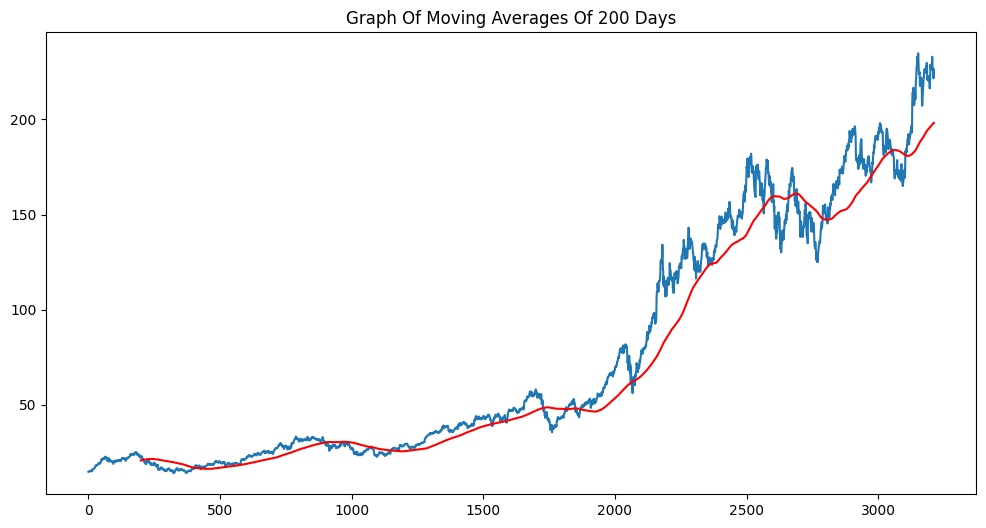

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')
plt.title('Graph Of Moving Averages Of 200 Days')

In [ ]:
df.shape

(3212, 5)

Spliting the dataset into (70%) training and (30%) testing set


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2248, 7)
(964, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469280,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607714,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719307,394024400


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2248,2020-12-08,124.370003,124.980003,123.089996,124.379997,121.759422,82225500
2249,2020-12-09,124.529999,125.949997,121.000000,121.779999,119.214195,115089200
2250,2020-12-10,120.500000,123.870003,120.150002,123.239998,120.643448,81312200
2251,2020-12-11,122.430000,122.760002,120.550003,122.410004,119.830902,86939800
2252,2020-12-14,122.599998,123.349998,121.540001,121.779999,119.214195,79184500


Using MinMax scalar for Normalization of dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.90651454],
       [0.90077564],
       [0.91325146]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2148, 100, 1)

ML Model (LSTM)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7cf59a2220e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - loss: 0.0028 - mean_absolute_error: 0.0324 - val_loss: 2915.3789 - val_mean_absolute_error: 50.5799
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - loss: 0.0023 - mean_absolute_error: 0.0312 - val_loss: 2910.3262 - val_mean_absolute_error: 50.5370
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 0.0024 - mean_absolute_error: 0.0311 - val_loss: 2907.8943 - val_mean_absolute_error: 50.5147
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - loss: 0.0021 - mean_absolute_error: 0.0284 - val_loss: 2911.5339 - val_mean_absolute_error: 50.5488
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0025 - mean_absolute_error: 0.0318 - val_loss: 2906.2202 - val_mean_absolute_error: 50.5011
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - loss: 0.0019 - mean_absolute_error: 0.0276 - val_loss: 2911.0400 - val_mean_absolute_error: 50.5476
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 0.0021 - mean_absolu

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape
test_close

array([[124.37999725],
       [121.77999878],
       [123.23999786],
       [122.41000366],
       [121.77999878],
       [127.87999725],
       [127.80999756],
       [128.69999695],
       [126.66000366],
       [128.22999573],
       [131.88000488],
       [130.96000671],
       [131.97000122],
       [136.69000244],
       [134.86999512],
       [133.72000122],
       [132.69000244],
       [129.41000366],
       [131.00999451],
       [126.59999847],
       [130.91999817],
       [132.05000305],
       [128.97999573],
       [128.80000305],
       [130.88999939],
       [128.91000366],
       [127.13999939],
       [127.83000183],
       [132.02999878],
       [136.86999512],
       [139.07000732],
       [142.91999817],
       [143.16000366],
       [142.05999756],
       [137.08999634],
       [131.96000671],
       [134.13999939],
       [134.99000549],
       [133.94000244],
       [137.38999939],
       [136.75999451],
       [136.91000366],
       [136.00999451],
       [135

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

final


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [ ]:
final_df.head()

,0
0,96.327499
1,98.357498
2,97.000000
3,97.272499
4,92.845001


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02610669],
       [0.04038184],
       [0.03083578],
       ...,
       [0.94360252],
       [0.90766848],
       [0.93635946]])

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02610669],
       [0.04038184],
       [0.03083578],
       ...,
       [0.94360252],
       [0.90766848],
       [0.93635946]])

Testing the Model

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(964, 100, 1)
(964,)


Making Prediction prediction  vs Actual value

plotting Graph Actual v

In [ ]:
# Making predictions
y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [ ]:
y_pred.shape

(964, 1)

In [ ]:
y_test

array([0.22337469, 0.20509123, 0.2153581 , 0.20952149, 0.20509123,
       0.24798704, 0.2474948 , 0.25375336, 0.23940792, 0.25044826,
       0.2761155 , 0.26964598, 0.27674836, 0.30993989, 0.29714141,
       0.28905454, 0.28181148, 0.2587462 , 0.2699975 , 0.23898596,
       0.26936463, 0.27731094, 0.25572234, 0.25445661, 0.26915368,
       0.25523015, 0.2427833 , 0.24763547, 0.27717027, 0.31120561,
       0.32667632, 0.35374985, 0.35543759, 0.34770224, 0.31275268,
       0.27667808, 0.29200801, 0.29798534, 0.29060161, 0.31486234,
       0.31043208, 0.31148696, 0.305158  , 0.30079813, 0.29896983,
       0.30065746, 0.28532753, 0.26880205, 0.26085585, 0.26198091,
       0.23476671, 0.23378222, 0.23019583, 0.19953587, 0.20143457,
       0.24735418, 0.22857848, 0.20706021, 0.19348826, 0.20255967,
       0.16697726, 0.20023907, 0.19243348, 0.20635701, 0.19981716,
       0.22063217, 0.2317429 , 0.22604692, 0.19630111, 0.19250377,
       0.21641292, 0.21043565, 0.19320697, 0.19672302, 0.20108

In [ ]:
y_pred

array([[0.20328397],
       [0.2049374 ],
       [0.20678692],
       [0.20874731],
       [0.21073903],
       [0.21263555],
       [0.21453017],
       [0.21657422],
       [0.21890675],
       [0.22138858],
       [0.22395447],
       [0.22674036],
       [0.2299016 ],
       [0.23353674],
       [0.2379417 ],
       [0.24327442],
       [0.24924895],
       [0.25526834],
       [0.2604343 ],
       [0.26429364],
       [0.26634085],
       [0.26683077],
       [0.2662758 ],
       [0.26498848],
       [0.26319674],
       [0.26120925],
       [0.2591872 ],
       [0.2571401 ],
       [0.25508898],
       [0.25327387],
       [0.25226644],
       [0.25265965],
       [0.25546157],
       [0.261289  ],
       [0.269938  ],
       [0.27976638],
       [0.2885052 ],
       [0.29491353],
       [0.2986824 ],
       [0.2999711 ],
       [0.29954344],
       [0.29816902],
       [0.29650456],
       [0.2949259 ],
       [0.29355136],
       [0.2923618 ],
       [0.2913332 ],
       [0.290

In [ ]:
scaler.scale_

array([0.0070321])

In [ ]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

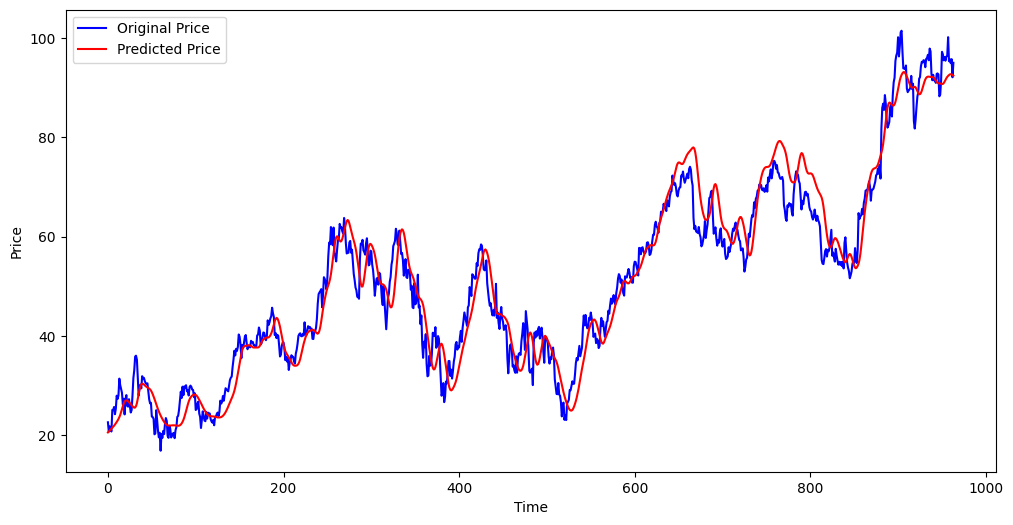

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  3.6766799010420006
